In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


In [121]:
df =pd.read_csv('train_kredi_tahmini.csv')
df2 = pd.read_csv('test_kredi_tahmini.csv')

In [122]:
train_original=df.copy()
test_original=df2.copy()

In [123]:
df.columns
#veri setindeki kolanları tanıyalım ,Eğitim(train) veri setinde
# 12 bağımsız değişken ve 1 hedef değişkenimiz var, yani Loan_Status var

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [124]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [125]:
df.dtypes ,df.shape

(Loan_ID               object
 Gender                object
 Married               object
 Dependents            object
 Education             object
 Self_Employed         object
 ApplicantIncome        int64
 CoapplicantIncome    float64
 LoanAmount           float64
 Loan_Amount_Term     float64
 Credit_History       float64
 Property_Area         object
 Loan_Status           object
 dtype: object,
 (614, 13))

#Eksik verileri tamamla kolonlarını yeniden isimlenidir hepsini sayısal veriye dönüştür ve sonra ölçeklendir.


# Yeni Bölüm

<Axes: xlabel='Education', ylabel='count'>

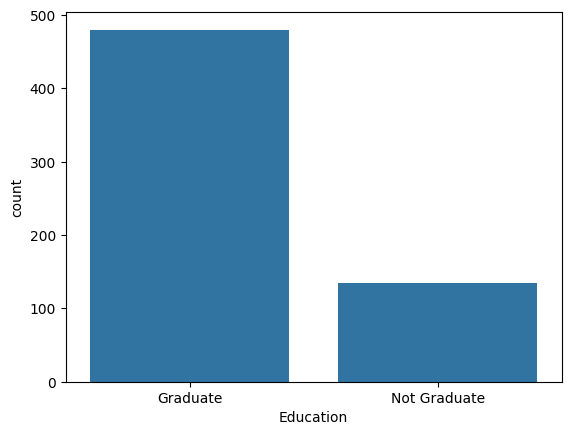

In [126]:
sns.countplot(x="Education",data=df)
# Education (Egitim_Durumu) için:
# graduate :1
# not graduate:0

In [127]:
print("""
{}
---------------------------
{}
---------------------------
{}
---------------------------
{}
""".format(df.Education.info() , df.Education.describe() , df.Education.unique() , df.Education.value_counts()))

<class 'pandas.core.series.Series'>
RangeIndex: 614 entries, 0 to 613
Series name: Education
Non-Null Count  Dtype 
--------------  ----- 
614 non-null    object
dtypes: object(1)
memory usage: 4.9+ KB

None
---------------------------
count          614
unique           2
top       Graduate
freq           480
Name: Education, dtype: object
---------------------------
['Graduate' 'Not Graduate']
---------------------------
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64



In [128]:
#egitim durumu eğitimliyse  1 degilse 0 döndürülecek ve degerleri sayısal hale getirecek

def education(row):
    if(row=="Graduate"):
        return 1
    else:
        return 0
df["Education"]=df["Education"].apply(education)
df["Education"]

0      1
1      1
2      1
3      0
4      1
      ..
609    1
610    1
611    1
612    1
613    1
Name: Education, Length: 614, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

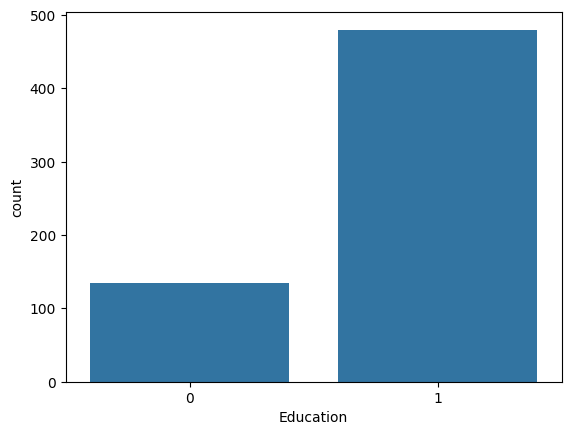

In [129]:
sns.countplot(x="Education",data=df)

<Axes: xlabel='Gender', ylabel='count'>

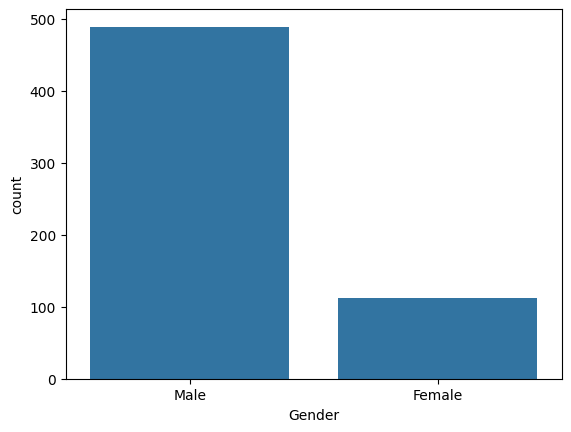

In [130]:
# Gander (Cinsiyet)
# Male:0
# Female:1
sns.countplot(x="Gender",data=df)

In [131]:
#  "Gender" sütununun bilgilerini, istatistiksel özetini, benzersiz değerlerini ve değer sayılarını ayrı ayrı yazdıracaktır.

print("""
{}
---------------------------
{}
---------------------------
{}
---------------------------
{}
""".format(df["Gender"].info() , df["Gender"].describe() , df["Gender"].unique() , df["Gender"].value_counts()))




<class 'pandas.core.series.Series'>
RangeIndex: 614 entries, 0 to 613
Series name: Gender
Non-Null Count  Dtype 
--------------  ----- 
601 non-null    object
dtypes: object(1)
memory usage: 4.9+ KB

None
---------------------------
count      601
unique       2
top       Male
freq       489
Name: Gender, dtype: object
---------------------------
['Male' 'Female' nan]
---------------------------
Gender
Male      489
Female    112
Name: count, dtype: int64



In [132]:
def gender(row):
    if(row=="Female"):
        return 1
    else:
        return 0
df["Gender"]=df["Gender"].apply(gender)

df["Gender"]

0      0
1      0
2      0
3      0
4      0
      ..
609    1
610    0
611    0
612    0
613    1
Name: Gender, Length: 614, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

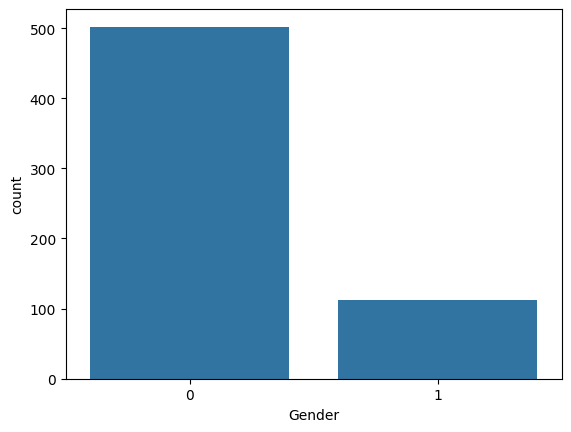

In [133]:
sns.countplot(x="Gender",data=df)

<Axes: xlabel='Married', ylabel='count'>

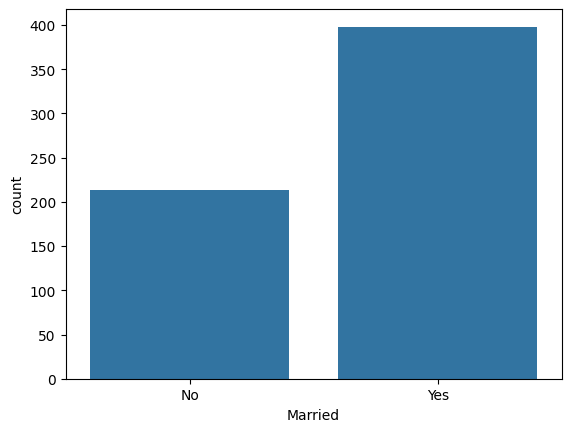

In [134]:
# Married(Medeni_Hali):
# Yes:1
# No:0

sns.countplot(x="Married",data=df)

In [135]:
print("""
{}
---------------------------
{}
---------------------------
{}
---------------------------
{}
""".format(df["Married"].info() , df["Married"].describe() , df["Married"].unique() , df["Married"].value_counts()))


<class 'pandas.core.series.Series'>
RangeIndex: 614 entries, 0 to 613
Series name: Married
Non-Null Count  Dtype 
--------------  ----- 
611 non-null    object
dtypes: object(1)
memory usage: 4.9+ KB

None
---------------------------
count     611
unique      2
top       Yes
freq      398
Name: Married, dtype: object
---------------------------
['No' 'Yes' nan]
---------------------------
Married
Yes    398
No     213
Name: count, dtype: int64



In [136]:
def married(row):
    if(row=="No"):
        return 0
    else:
        return 1
df["Married"]=df["Married"].apply(married)
df["Married"]

0      0
1      1
2      1
3      1
4      0
      ..
609    0
610    1
611    1
612    1
613    0
Name: Married, Length: 614, dtype: int64

<Axes: xlabel='Married', ylabel='count'>

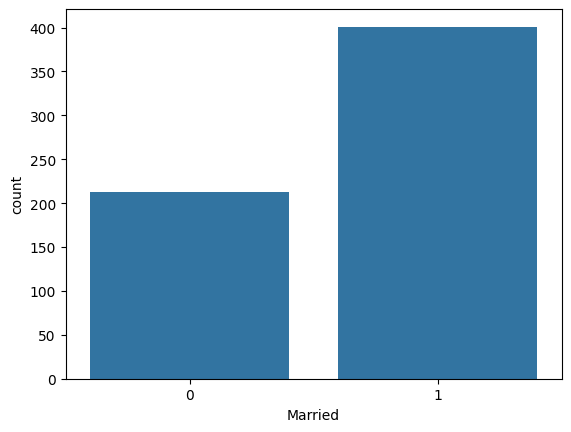

In [137]:
sns.countplot(x="Married",data=df)

#Veri Ön İşleme

#Gereksiz sütunları kaldıralım ve eksik değerleri işleyelim:

In [138]:
# LoanID : Silinecek

df.drop("Loan_ID",axis=1,inplace=True)
try:
    print(df["Loan_ID"])
except KeyError:
    print("Sütun bulunamadı.")

Sütun bulunamadı.


<Axes: xlabel='Dependents', ylabel='count'>

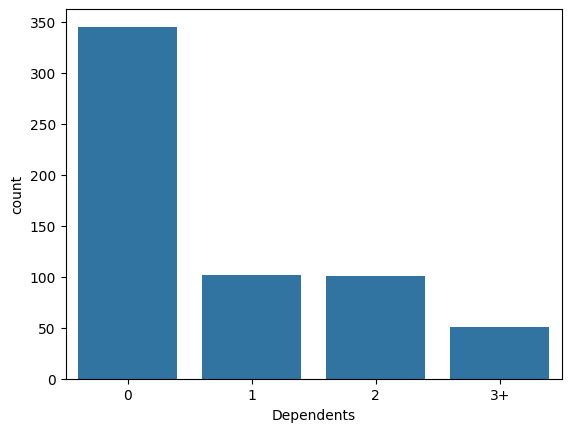

In [139]:
# Dependents (CocukSayisi):Sayısala Dönüşecek Ordinal

sns.countplot(x="Dependents",data=df)

In [140]:
def dependents(row):
    if(row=="1" or row=="2" or row=="3"):
        return 0
    else:
        return 1

def dependents_1(row):
    if(row=="1"):
        return 1
    else:
        return 0

def dependents_2(row):
    if(row=="2"):
        return 1
    else:
        return 0

def dependents_3(row):
    if(row=="3+"):
        return 1
    else:
        return 0




In [141]:
#Bu satırlar, sırasıyla "Dependents_1", "Dependents_2" ve "Dependents_3+" adlı ikili sütunları ekler.
#Her biri, ilgili fonksiyonları kullanarak oluşturulur.
#Son olarak, artık ihtiyaç duyulmayan "Dependents" sütunu veri setinden çıkarılır.

df["Dependents_0"]=df["Dependents"].apply(dependents)
df["Dependents_1"]=df["Dependents"].apply(dependents_1)
df["Dependents_2"]=df["Dependents"].apply(dependents_2)
df["Dependents_3+"]=df["Dependents"].apply(dependents_3)
df.drop("Dependents",axis=1,inplace=True)

In [142]:
#DataFrame olan df üzerinden "Dependents_0", "Dependents_1", "Dependents_2", "Dependents_3+" adlı dört sütunu
#S seçerek bir alt veri seti oluşturuyor.
# Bu sütunlar, önceki adımlarda "Dependents" sütunundan türetilen ikili sütunlardır.
df[["Dependents_0","Dependents_1","Dependents_2","Dependents_3+"]]


,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,1,0,0,0
1,0,1,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
609,1,0,0,0
610,1,0,0,1
611,0,1,0,0
612,0,0,1,0


<Axes: xlabel='Self_Employed', ylabel='count'>

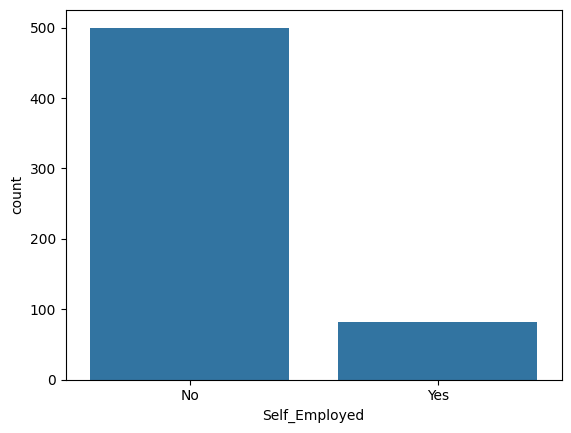

In [143]:
# SelfEmployed (Patron):
# Yes:1
# No:0

sns.countplot(x="Self_Employed",data=df)

In [144]:
def self_employed(row):
    if(row=="Yes"):
        return 1
    else:
        return 0
df["Self_Employed"]=df["Self_Employed"].apply(self_employed)
df["Self_Employed"]

0      0
1      0
2      1
3      0
4      0
      ..
609    0
610    0
611    0
612    0
613    1
Name: Self_Employed, Length: 614, dtype: int64

<Axes: xlabel='Self_Employed', ylabel='count'>

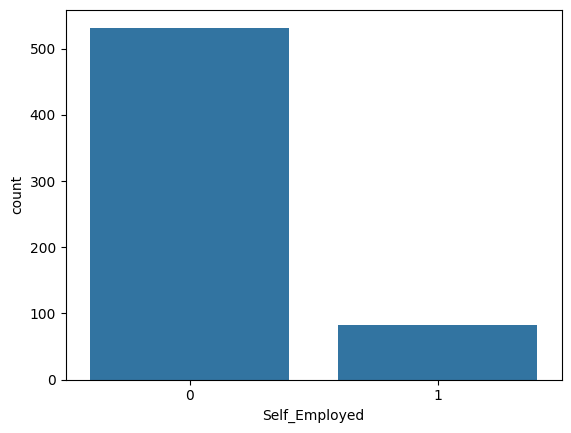

In [145]:
sns.countplot(x="Self_Employed",data=df)

In [146]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,0,0,1,0,5849,0.0,NaN,360.0,1.0,Urban,Y,1,0,0,0
1,0,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,N,0,1,0,0
2,0,1,1,1,3000,0.0,66.0,360.0,1.0,Urban,Y,1,0,0,0
3,0,1,0,0,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,0,0,0
4,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,0,0


# ApplicantIncome (GelirDuzeyi):Olduğu Gibi Kalacak
# CoapplicantIncome (EkGelirDuzeyi):Olduğu Gibi Kalacak
# LoanAmount (KrediMiktarı):Olduğu Gibi Kalacak
# Loan_Amount_Term (KrediVadesi):Olduğu Gibi Kalacak
# Credit_History (OncedenKrediAlmismi):Olduğu Gibi Kalacak
#sutunların null olan degerlerine sutunun genel ortalamasını alıp null degerlerin içine yazıyoruz yapılan  işlemler bu yonde ilerleyecek

In [147]:
#stunlarda null deger varmı kontrol edilecek
df[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"]].isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

<Axes: >

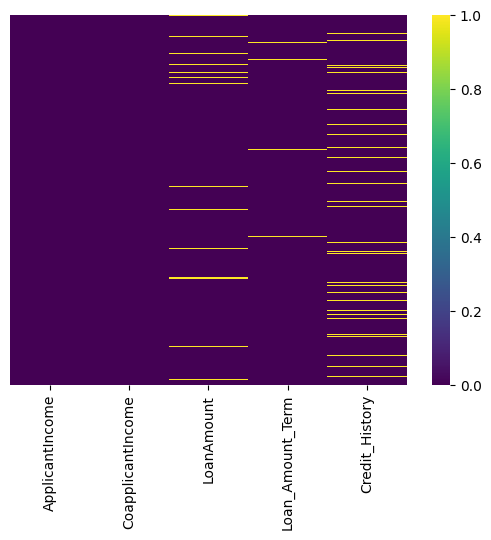

In [148]:
sns.heatmap(df[["ApplicantIncome","CoapplicantIncome","LoanAmount",
                "Loan_Amount_Term","Credit_History"]].isnull(),yticklabels=False,cmap="viridis")
#loanAmount Loan_Amount Credit_History degerleri null oldugunu map grafiğinde de göruluyor

In [149]:
# LoanAmount" sütunundaki değerleri inceleyerek, eğer bir değer negatif değilse veya sıfır değilse,
# o değeri korur; aksi takdirde, değeri 146.412162 ile değiştirir.

df["LoanAmount"].describe()[1] #sutunun istatiksel verilerinden olan mean(ortalama)  dondurur


np.float64(146.41216216216216)

In [150]:
def loan_amount(row):
    if(row<0 or row>=0):
        return row
    else:
        return 146.412162

In [151]:
df["Loan_Amount_Term"].describe()[1]

np.float64(342.0)

In [152]:
def loan_amount_term(row):
    if(row<0 or row>=0):
        return row
    else:
        return 342.00000

In [153]:
df["Credit_History"].describe()[1]

np.float64(0.8421985815602837)

In [154]:
def credit_history(row):
    if(row<0 or row>=0):
        return row
    else:
        return 0.842199

In [155]:
df["LoanAmount"]=df["LoanAmount"].apply(loan_amount)
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].apply(loan_amount_term)
df["Credit_History"]=df["Credit_History"].apply(credit_history)

In [156]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,Urban,Y,1,0,0,0
1,0,1,1,0,4583,1508.0,128.000000,360.0,1.0,Rural,N,0,1,0,0
2,0,1,1,1,3000,0.0,66.000000,360.0,1.0,Urban,Y,1,0,0,0
3,0,1,0,0,2583,2358.0,120.000000,360.0,1.0,Urban,Y,1,0,0,0
4,0,0,1,0,6000,0.0,141.000000,360.0,1.0,Urban,Y,1,0,0,0


#Property_Area (one hot encode): Urban=Kentsel Rural=Kırsal semiurban=Yarı_kentsel
#degerleride sayısallaştırmamız gerekiyor

<Axes: xlabel='Property_Area', ylabel='count'>

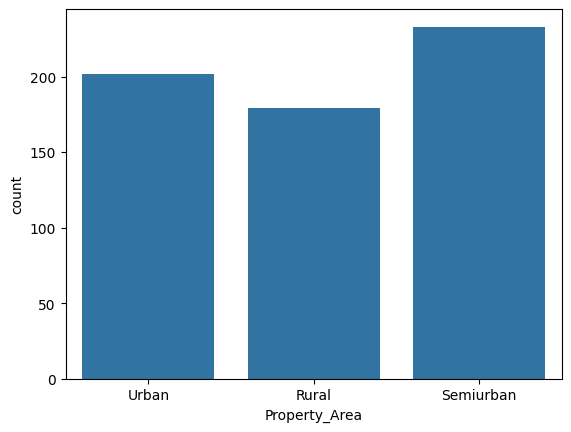

In [157]:
sns.countplot(x="Property_Area",data=df)

In [158]:
def propertyAreaUrban(row):
    if(row=="Urban"):
        return 1
    else:
        return 0
def propertyAreaRural(row):
    if(row=="Rural"):
        return 1
    else:
        return 0
def propertyAreaSemiurban(row):
    if(row=="Semiurban"):
        return 1
    else:
        return 0

In [159]:
df["Kentsel"]=df["Property_Area"].apply(propertyAreaUrban)
df["Kırsal"]=df["Property_Area"].apply(propertyAreaRural)
df["Yarı_kentsel"]=df["Property_Area"].apply(propertyAreaSemiurban)
df.drop("Property_Area",axis=1,inplace=True)

In [160]:
df[["Kentsel","Kırsal","Yarı_kentsel"]]


,Kentsel,Kırsal,Yarı_kentsel
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
609,0,1,0
610,0,1,0
611,1,0,0
612,1,0,0


In [161]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Kentsel,Kırsal,Yarı_kentsel
0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,Y,1,0,0,0,1,0,0
1,0,1,1,0,4583,1508.0,128.000000,360.0,1.0,N,0,1,0,0,0,1,0
2,0,1,1,1,3000,0.0,66.000000,360.0,1.0,Y,1,0,0,0,1,0,0
3,0,1,0,0,2583,2358.0,120.000000,360.0,1.0,Y,1,0,0,0,1,0,0
4,0,0,1,0,6000,0.0,141.000000,360.0,1.0,Y,1,0,0,0,1,0,0


<!-- Loan_Status (KrediyeUygun):
Bu alan y olarak farklı bir dataframe olacak ve bu tahmin ettirilecek eğitim ve tets dataframe'inden çıkarılacak
Yes:1
No:0 -->

#Loan_Status (KrediyeUygun):
#Bu alan y olarak farklı bir dataframe olacak ve bu tahmin ettirilecek eğitim ve test dataframe'inden çıkarılacak
#Yes:1
#No:0

<Axes: xlabel='Loan_Status', ylabel='count'>

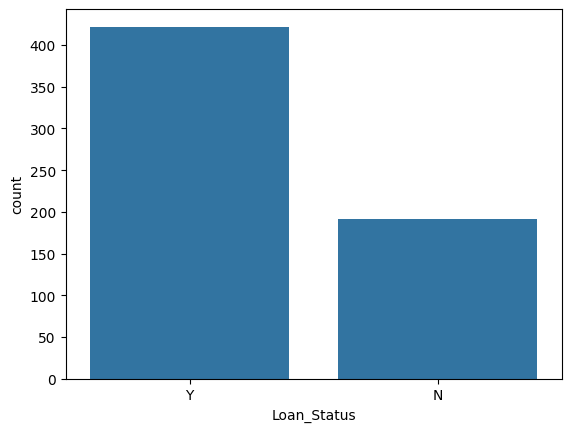

In [162]:
sns.countplot(x="Loan_Status",data=df)

In [163]:
y=pd.DataFrame(df,columns=["Loan_Status"])
y.head()
#kredi onayını bir dgere atıyoruz ardından veri setinde siliyoruz onu ayrı bir veri seti halıne getiriyoruz

,Loan_Status
0,Y
1,N
2,Y
3,Y
4,Y


In [164]:
df.drop("Loan_Status",axis=1,inplace=True)

try:
    df2.drop("Loan_Status",axis=1,inplace=True)
except KeyError:
    print("Silinecek kolon yok.")

Silinecek kolon yok.


In [165]:
df.columns , df2.columns

(Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
        'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
        'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
        'Kentsel', 'Kırsal', 'Yarı_kentsel'],
       dtype='object'),
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
       dtype='object'))

In [166]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Kentsel,Kırsal,Yarı_kentsel
0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,1,0,0
1,0,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,1,0,0,0,1,0
2,0,1,1,1,3000,0.0,66.000000,360.0,1.0,1,0,0,0,1,0,0
3,0,1,0,0,2583,2358.0,120.000000,360.0,1.0,1,0,0,0,1,0,0
4,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,0,0,0,1,0,0


In [167]:
X=df.copy()
y=y.copy()
#egitim verimizin son halini x degerine kopyaladıktan sonra
# kredi uygunlugu olarak yarattığımız y veri setini de y olarak kopyaladık

In [168]:
def yData(row):
    if(row=="Y"):
        return 1
    else:
        return 0
y=y["Loan_Status"].apply(yData)
#kopyaladıpımız kredi durumu verisi sayısallaştıryoruz

In [169]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression



In [170]:

# Veriyi ve hedef değişkeni (x ve y) kullanarak eğitim ve test setlerini oluşturma
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [171]:
models = [LogisticRegression]


In [172]:
Score_accuracy=[]
Score_f1=[]
ModelName=[]


for model in models:
    alg = model().fit(X_train,Y_train)
    y_pred = alg.predict(X_test)
    Score_accuracy.append((accuracy_score(Y_test, y_pred)))
    Score_f1.append((f1_score(Y_test, y_pred, average='weighted')))
    ModelName.append(model.__name__)
    Results = pd.DataFrame({'ModelName':ModelName, 'Score_accuracy':Score_accuracy, 'Score_f1':Score_f1})


In [173]:
Results

,ModelName,Score_accuracy,Score_f1
0,LogisticRegression,0.79803,0.775606


#Hiperparametre Optimizasyonu Sonrasında Model Scorları

In [174]:
ModelName=[]
Score_f1=[]
Score_accuracy=[]

In [175]:
# LogisticRegression
tuned=LogisticRegression(solver='liblinear').fit(X_train, Y_train)
ModelName.append(LogisticRegression.__name__)
Score_f1.append(f1_score(Y_test, tuned.predict(X_test), average='weighted'))
Score_accuracy.append(accuracy_score(Y_test, tuned.predict(X_test)))


In [176]:
Results_best = pd.DataFrame({'ModelName':ModelName, 'Score_f1':Score_f1, 'Score_accuracy':Score_accuracy})
Results_best

,ModelName,Score_f1,Score_accuracy
0,LogisticRegression,0.762562,0.788177


In [177]:
from sklearn.model_selection import cross_val_score

# Logistic Regression modelini oluşturun
model = LogisticRegression(solver='liblinear')

# Çapraz doğrulama işlemi
f1_scores = cross_val_score(model, X, y, cv=5, scoring='f1_weighted')
accuracy_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Ortalama F1 Score ve AccuraScy Score
mean_f1_score = f1_scores.mean()
mean_accuracy_score = accuracy_scores.mean()

print("Ortalama F1 Score:", mean_f1_score)
print("Ortalama Accuracy Score: ", mean_accuracy_score)


Ortalama F1 Score: 0.7817078930016056
Ortalama Accuracy Score:  0.8061975209916034


In [184]:
example_data = {
    'Gender': [1], # Örneğin cinsiyeti: 1 - Female, 0 - Male
    'Married': [1],  # Örneğin medeni durumu: 1 - Yes, 0 - No
    'Education': [0], # Örneğin eğitim durumu: 1 - Graduate, 0 - Not Graduate
     'Self_Employed': [1],  # Örneğin kendi işi var mı: 1 - Yes, 0 - No
     'ApplicantIncome': [1000],  # Örneğin başvuru sahibinin geliri
    'CoapplicantIncome': [1000], # Örneğin başvuru sahibinin eşinin geliri
    'LoanAmount': [750],  # Örneğin talep edilen kredi miktarı
    'Loan_Amount_Term': [360],  # Örneğin kredi vadesi
    'Credit_History': [0], # Örneğin kredi geçmişi: 1 - Good, 0 - Bad
    'Dependents_0': [0],# Örneğin çocuk sayısı
    'Dependents_1': [0],
    'Dependents_2': [0],
    'Dependents_3+': [1],
    'Kentsel': [0],# Örneğin mülkiyet bölgesi: Urban, Rural, Semiurban
    'Kırsal': [0],
    'Yarı_kentsel': [1]
}

# Eğitimde kullanılan sütun isimlerini al
feature_columns = X_train.columns

# Örnek veri çerçevesini oluşturun ve sütunları uyumlu hale getirin
example_df = pd.DataFrame(example_data, columns=feature_columns)

# Modelin tahminini alın
prediction = tuned.predict(example_df)

# Tahmin sonucunu yazdırın
if prediction[0] == 1:
    print("Kredi başvurunuz onaylanmıştır.")
else:
    print("Kredi başvurunuz maalesef onaylanmamıştır.")

Kredi başvurunuz maalesef onaylanmamıştır.
